# **Project Title :-** Multi-Class Performance Analysis using KNN: Understanding the Confusion Matrix and Evaluation Metrics for Six-Class Output

# **Introduction**

This project explores multi-class classification performance analysis using the K-Nearest Neighbors (KNN) algorithm. The focus is on understanding how different metrics—like accuracy, precision, recall, and F1-score—are derived from the confusion matrix for a six-class classification problem. By the end of the project, you'll understand how to interpret performance metrics and make meaningful insights about model performance.

# **Introdution to the Dataset**

The Glass Identification Dataset is a well-known dataset in the field of machine learning and forensic science. It is primarily used for classification tasks, where the goal is to predict the type of glass based on its chemical composition. This dataset has been used in studies related to criminal investigations, particularly to determine the origin of glass fragments found at crime scenes.

**Dataset Overview**
Each row in the dataset represents a glass sample, with various chemical elements and refractive index as input features. The dataset concludes with a target variable called Type, which denotes the category of glass the sample belongs to (e.g., building windows, containers, headlamps).

**Column Descriptions:**
* **RI (Refractive Index):** A physical property of the glass that measures how much it bends light.

* **Na (Sodium):** Percentage of sodium content in the glass.

* **Mg (Magnesium):** Percentage of magnesium, which affects strength and durability.

* **Al (Aluminum):** Percentage of aluminum, which influences chemical resistance.

* **Si (Silicon):** Percentage of silicon dioxide, a major component of glass.

* **K (Potassium):** A minor component influencing durability.

* **Ca (Calcium):** Affects hardness and stability.

* **Ba (Barium):** Sometimes added to glass for increased refractive index and clarity.

* **Fe (Iron):** Can affect the color and transparency of glass.

* **Type (Target Variable):** Indicates the class of glass. Values represent different categories such as:

1 = Building windows (float processed)

2 = Building windows (non-float processed)

3 = Vehicle windows

4 = Containers

5 = Tableware

6 = Headlamps



# **Importing Libraries**

In [ ]:
import pandas as pd # Data Manipulation and Analysis
import numpy as np # Numerical Operations and Array Handling
import seaborn as sn # Enhanced Data Visualization
import matplotlib.pyplot as plt # Data Visualization

# Enables the display of matplotlib plots directly within the Jupyter Notebook output cells
%matplotlib inline

# **Loading Dataset**

In [ ]:
# Loads the dataset from the 'glass1.csv' file into a DataFrame named df
df = pd.read_csv('glass1.csv')

# **Tabular Analysis**

In [ ]:
# Displays the first 5 rows of the DataFrame to get a quick look at the data
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# Prints the number of rows and columns in the dataset
print("the number of rows and columns of our dataset is",df.shape)

the number of rows and columns of our dataset is (214, 10)


In [ ]:
# Shows information about the DataFrame including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
# Displays descriptive statistics (like mean, std, min, max) for each numeric column, transposed for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [ ]:
# Checks for missing (null) values in each column and displays the count
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


# **Data Visualization**

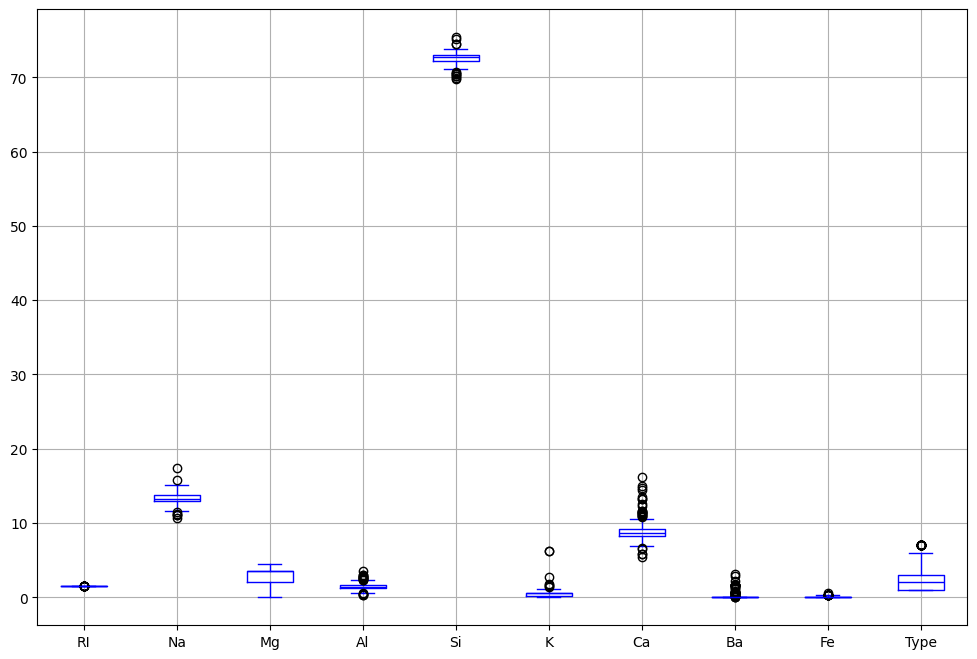

In [ ]:
# Draws boxplots for all numerical columns to detect outliers
plt.figure(figsize=(12,8))
df.boxplot(color='blue')
plt.show()

<Axes: ylabel='Ca'>

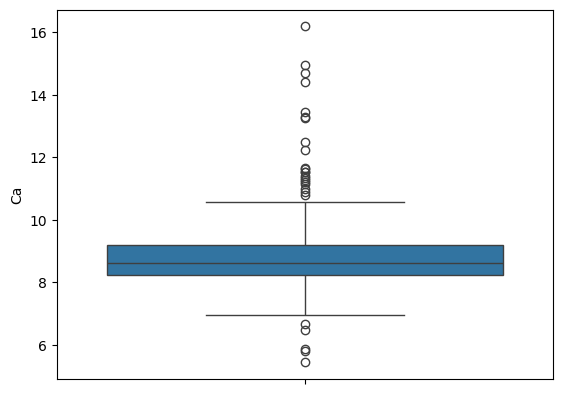

In [ ]:
# Creates a boxplot for the 'Ca' column to visualize its distribution and detect outliers
sn.boxplot(data=df['Ca'])

<Axes: ylabel='Al'>

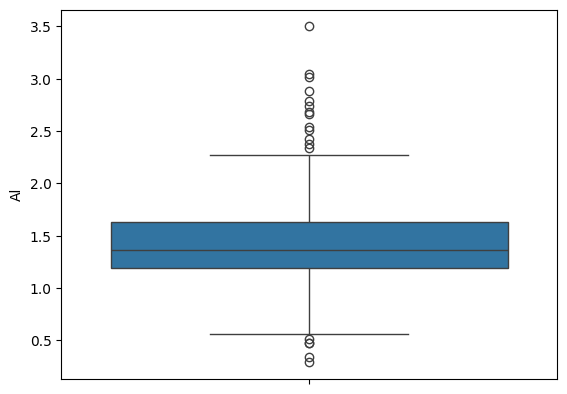

In [ ]:
# Creates a boxplot for the 'Al' column to visualize its distribution and identify potential outliers
sn.boxplot(data=df['Al'])

In [ ]:
# Most of our columns have outlier data, maximum being in CA and AL fields. Standard Scaling is recommended.

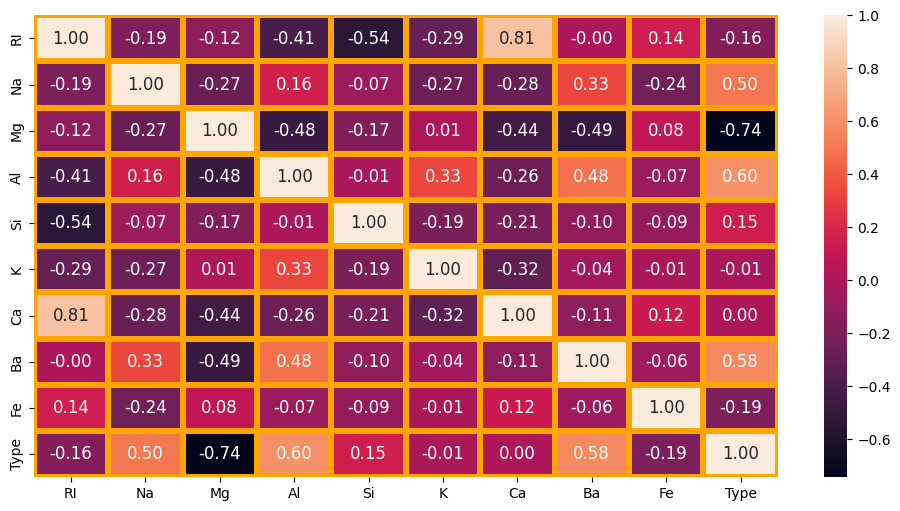

In [ ]:
# Plots a heatmap to show correlation between numerical features
plt.figure(figsize=(12,6))
sn.heatmap(data=df.corr(),annot = True,fmt='0.2f',annot_kws={'size':12},linewidth=4,linecolor='orange')
plt.show()

<Figure size 3000x3000 with 0 Axes>

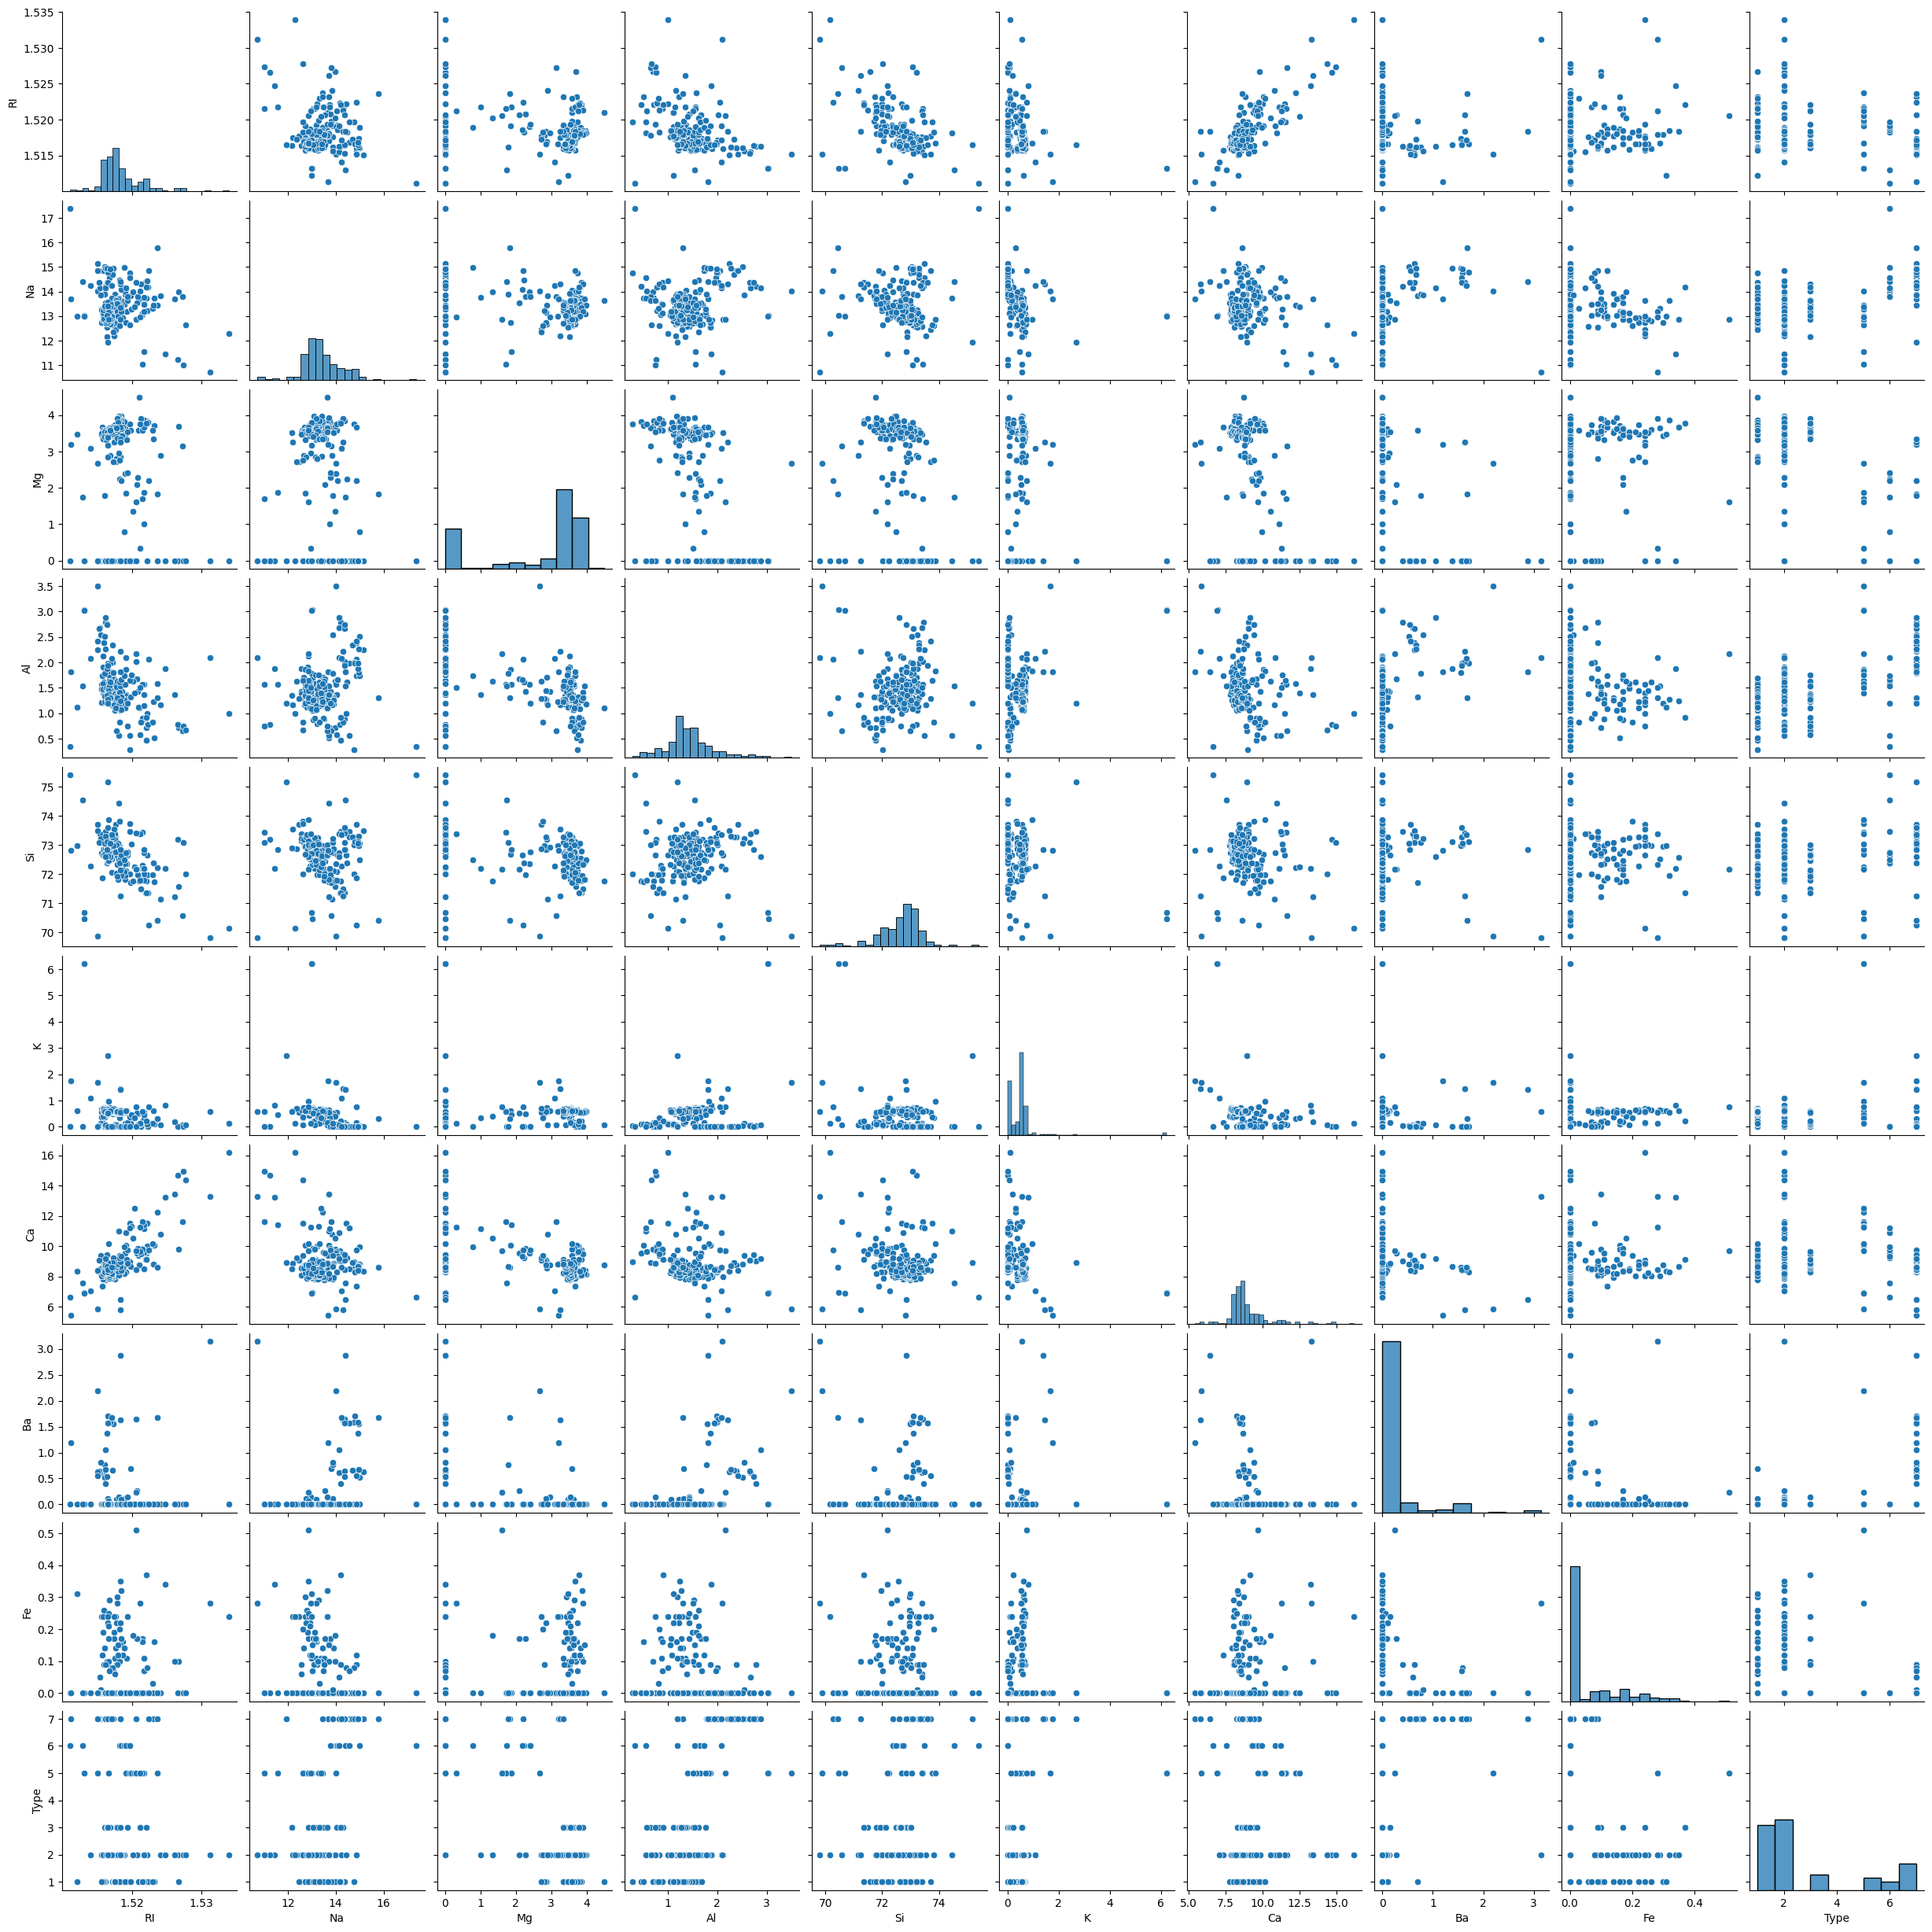

In [ ]:
# Creates pairwise plots to visualize relationships between all features
plt.figure(figsize=(30,30))
sn.pairplot(df)
plt.show()

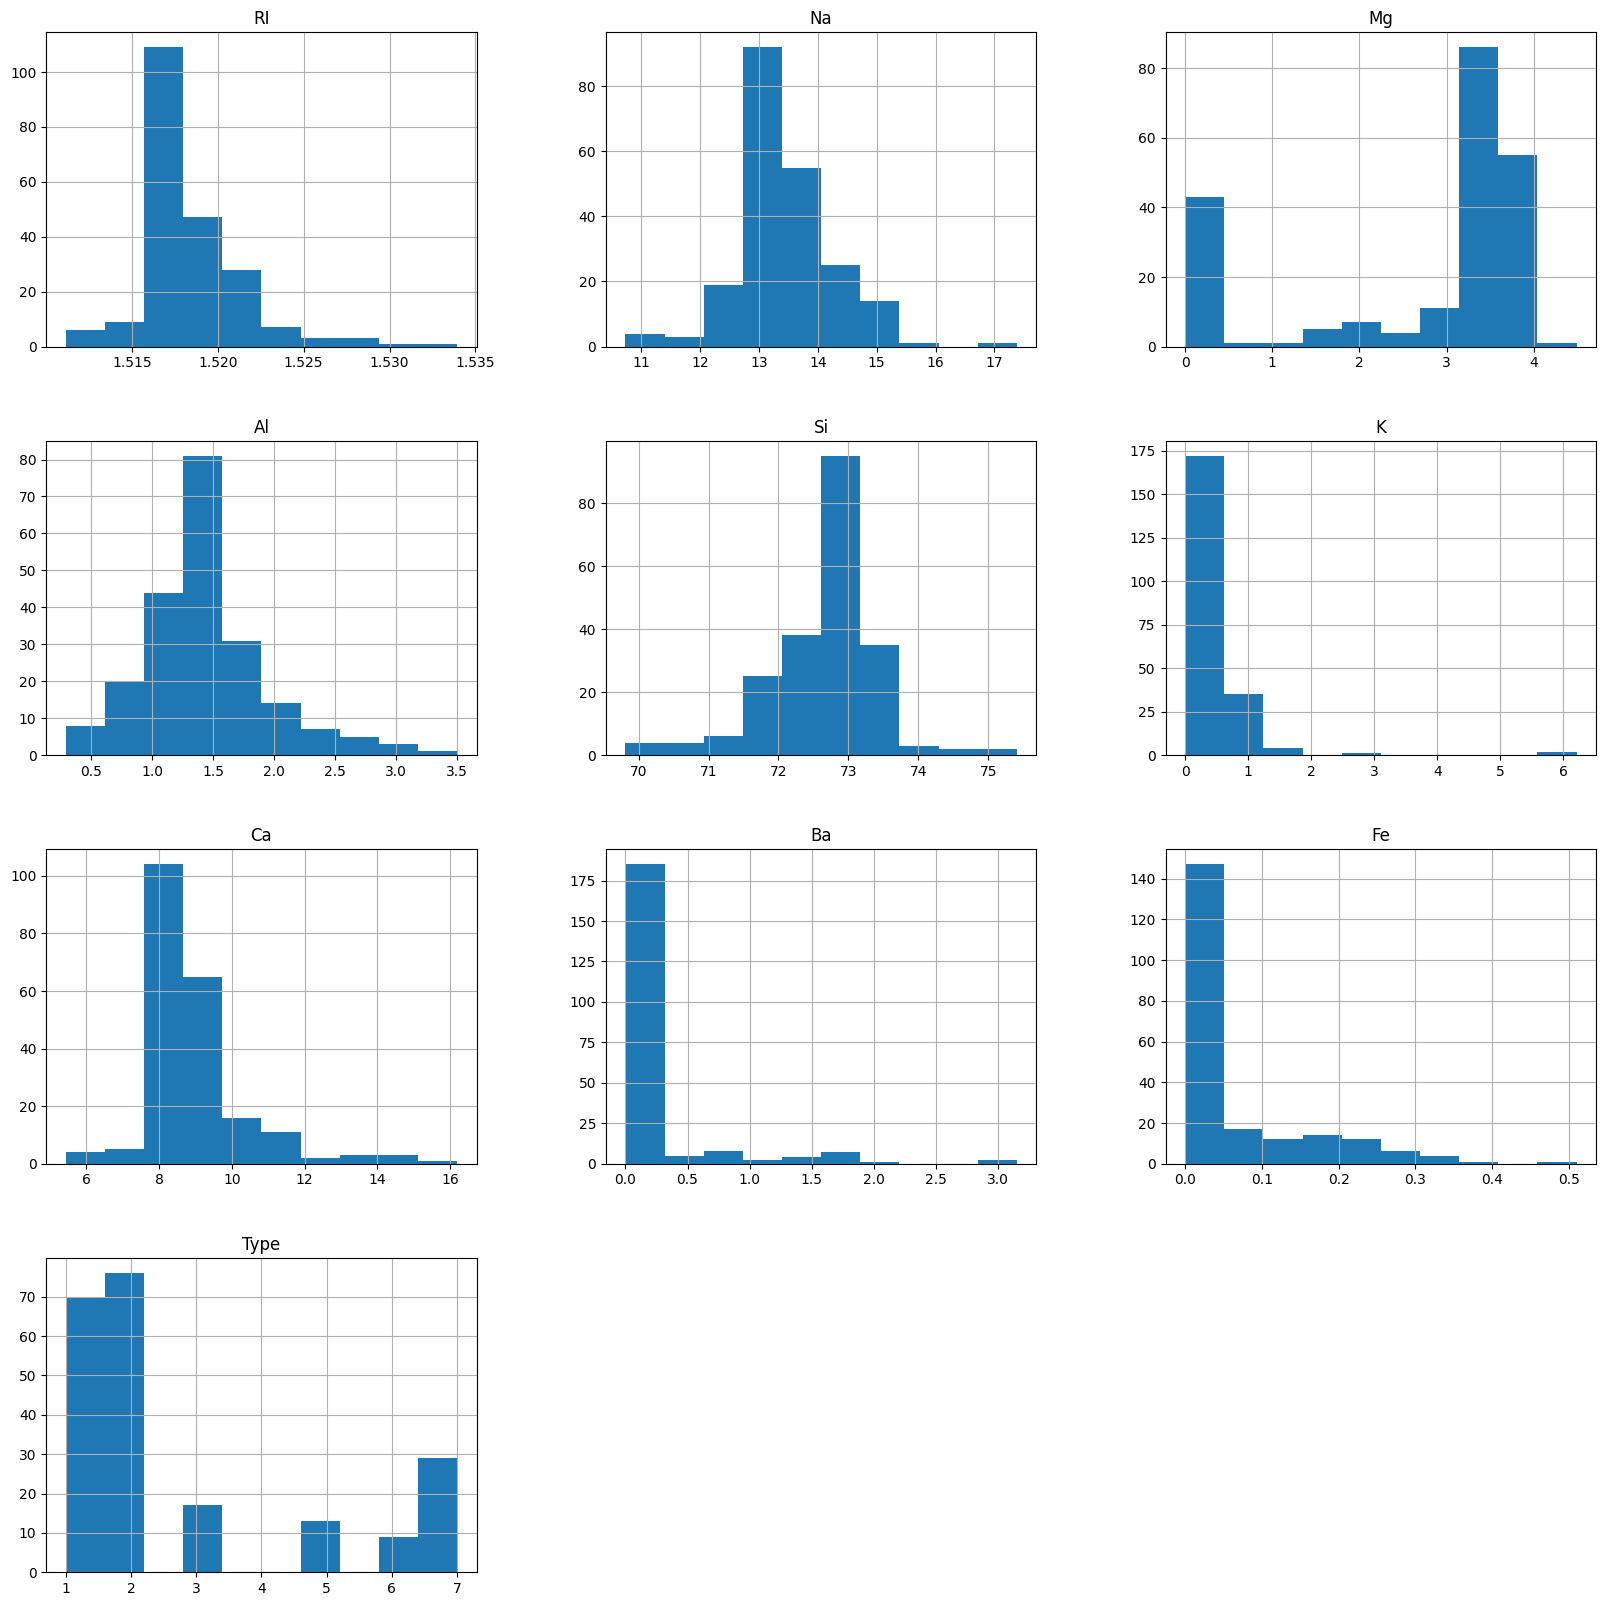

In [ ]:
# Plots histograms to show the distribution of each numerical feature
df.hist(figsize=(20,20))
plt.show()

# **Deciding x and y and Applying train-test split method**

In [ ]:
# Imports the train_test_split function for splitting the dataset
from sklearn.model_selection import train_test_split

# Separates the features (X) by dropping the target column 'Type'
x = df.drop('Type',axis=1).values

# Sets the target variable (y) as the 'Type' column values
y = df['Type'].values

In [ ]:
# Displays the feature matrix containing all input variables
x

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [ ]:
# Displays the target array containing class labels from the 'Type' column
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [ ]:
# Splits the dataset into training and testing sets (67% train, 33% test)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33)

In [ ]:
#Fitting Classifier to the training set
#Loading Libraries
from sklearn.neighbors import KNeighborsClassifier
# Instantiate learning Model (k=7)
classifier = KNeighborsClassifier(n_neighbors=3)
#Fitting the model
classifier.fit(x_train,y_train)
#Predicting the results
y_pred = classifier.predict(x_test)

In [ ]:
# Imports functions to evaluate model performance: confusion matrix, accuracy score, classification report, and display utility
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

# Computes the confusion matrix comparing actual vs predicted values
cm = confusion_matrix(y_test, y_pred)

# Displays the confusion matrix values
cm

array([[16,  4,  1,  0,  0,  0],
       [ 4, 20,  0,  1,  1,  0],
       [ 5,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  4,  0,  0],
       [ 0,  1,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  9]])

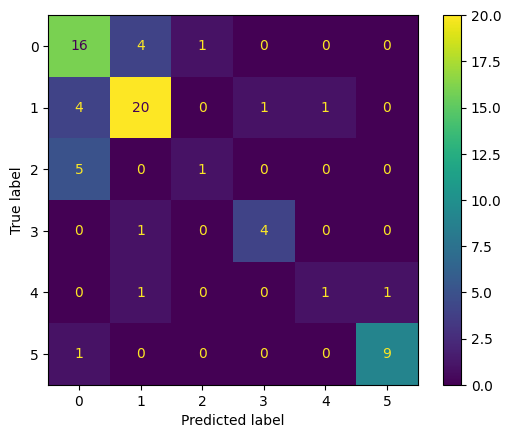

In [ ]:
# Creates a ConfusionMatrixDisplay object using the computed confusion matrix
cmd=ConfusionMatrixDisplay(cm)

# Plots the visual representation of the confusion matrix
cmd.plot()

# Displays the plot
plt.show()

In [ ]:
# Calculates the model accuracy as a percentage and prints it rounded to 2 decimal places
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 71.83 %.


In [ ]:
# Generates a detailed classification report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.69      0.86      0.77        29
           2       0.68      0.65      0.67        23
           3       0.00      0.00      0.00         5
           5       1.00      0.67      0.80         3
           6       0.50      0.50      0.50         2
           7       0.88      0.78      0.82         9

    accuracy                           0.70        71
   macro avg       0.63      0.58      0.59        71
weighted avg       0.67      0.70      0.68        71



# **Conclusion**

In this project, we implemented a K-Nearest Neighbors (KNN) model for multi-class classification, focusing on evaluating performance using a six-class target variable. The dataset was explored and preprocessed to ensure quality input for the model. KNN, being a non-parametric algorithm, was chosen for its simplicity and effectiveness in handling classification tasks with complex boundaries.

The model was trained and tested, and results were interpreted using a confusion matrix and key evaluation metrics like accuracy, precision, recall, and F1-score for each class. These metrics provided a granular view of the model’s ability to distinguish between all six classes, revealing strengths in predicting certain categories while highlighting challenges in others—especially where class imbalance may exist.

Overall, the project showcases how KNN can be effectively applied to multi-class problems, and emphasizes the importance of detailed evaluation metrics beyond overall accuracy to truly understand model performance across all categories. This analysis is vital for applications where balanced and fair classification is crucial, such as in medical diagnosis, fraud detection, or customer segmentation.